In [183]:
# With/out Eyeglasses yapacağız.
# Datasetimiz celebA. Dateseti 202599 ünlü fotoğrafı içerir. 
# Aynı zamanda 40 özniteliğe sahiptir (gülümseme, saç rengi, gözlük kullanımı vb.).
# Datasetimiz 3 parçadan oluşuyor (Train, validation,test).

In [184]:
# Train, validation ve test dataseti arasındaki farklar:

# Train veri seti üzerinde doğru model seçimi yapılarak algoritma belirlenir.
# Validation bölümünde ise uygulanan model iyileştirilmeye çalışılır. 
# Bunun için hyperparameter tuning uygulanarak en optimum katsayılar/ağırlıklar bulunmaya çalışılır. 
# Test datasetinde tahminler ile gerçek veriler karşılaştırılır.

In [185]:
import torchvision
import torch
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

LOADING DATASET

In [186]:
 from torchvision import transforms

In [187]:
image_path = './'

In [188]:
print('Validation set:', len(celeba_valid_dataset)),
print('Test set:', len(celeba_test_dataset))

Validation set: 1000
Test set: 19962


In [189]:
# Datamızı neye göre sınıflandıracağımızı seçiyoruz.
# (attrubites listesinden. Gözlüklü/gözlüksüz sınıflandırması için numaramız 15).
attr_eyeglasses= lambda attr: attr[15]

Data Augmentation 

# Data augmentation modelin doğruluğunu artırmak için küçük boyutlu datasetlerde kullanılan bir tekniktir.
# Varolan datasetlerle oynayarak (crop,flip,changing the contrast/brightness) datasetin miktarı artılır.
# Overfittingi azaltır.

In [190]:
#Train datasetimizi kırpma, simetri alma ve yeniden boyutlandırma işlemi yapacağız.

transform_train = transforms.Compose([
    transforms.RandomCrop([178, 178]),
    transforms.RandomHorizontalFlip(),
    transforms.Resize([64, 64]),
    transforms.ToTensor(),
])

In [191]:
# Bu kısım ise validation ve test datasetimize uygulayacağımız kısım.
transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),
    transforms.Resize([64, 64]),
    transforms.ToTensor(),
])

In [192]:
from torch.utils.data import DataLoader
celeba_train_dataset = torchvision.datasets.CelebA(image_path, split='train',target_type='attr', download=True,transform=transform_train, target_transform=attr_eyeglasses)

Files already downloaded and verified


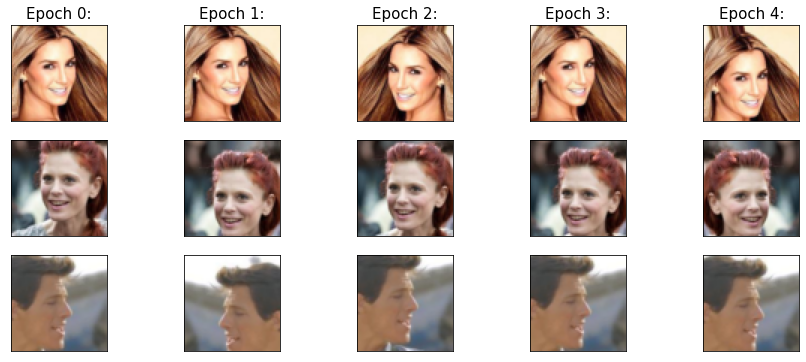

In [193]:
# aşağıdaki görselden de anlaşılacağı üzere datamızla her iterasyonda farklı şekilde oynanmış (random şekilde).

torch.manual_seed(1)
data_loader = DataLoader(celeba_train_dataset, batch_size=3)
fig = plt.figure(figsize=(15, 6))
num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(data_loader))
    img = img_batch[0]
    ax = fig.add_subplot(3, 5, j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Epoch {j}:', size=15) 
    ax.imshow(img.permute(1, 2, 0))
    img = img_batch[1]
    ax = fig.add_subplot(3, 5, j + 6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))
    img = img_batch[2]
    ax = fig.add_subplot(3, 5, j + 11)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))
plt.show()

In [194]:
celeba_valid_dataset =torchvision.datasets.CelebA(image_path, split='valid',target_type='attr', download=True,transform=transform, target_transform=attr_eyeglasses)
celeba_test_dataset = torchvision.datasets.CelebA(image_path, split='test',target_type='attr', download=True,transform=transform, target_transform=attr_eyeglasses)

Files already downloaded and verified
Files already downloaded and verified


In [195]:
#datasetimiz çok büyük biraz küçültmek için datasetimizin bir altkümesiyle çalışacağız.

from torch.utils.data import Subset
celeba_train_dataset = Subset(celeba_train_dataset,torch.arange(16000))
celeba_valid_dataset = Subset(celeba_valid_dataset,torch.arange(1000))
print('Train set:', len(celeba_train_dataset))
print('Validation set:', len(celeba_valid_dataset))

Train set: 16000
Validation set: 1000


In [196]:
batch_size = 32
torch.manual_seed(1)
train_dl = DataLoader(celeba_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(celeba_valid_dataset,batch_size, shuffle=False)
test_dl = DataLoader(celeba_test_dataset,batch_size, shuffle=False)

Training a CNN model

In [197]:
# Bu operasyon için CNN model kullanacağız. 
# CNN genellikle görüntü işlemede kullanılan ve girdi olarak görselleri alan bir derin öğrenme algoritmasıdır. 
# Farklı operasyonlarla görsellerdeki özellikleri yakalayan ve onları sınıflandıran bu algoritma farklı katmanlardan oluşmaktadır.

import torch.nn as nn
model=nn.Sequential()
model.add_module('conv1',nn.Conv2d(in_channels=3, out_channels=32,kernel_size=3, padding=1))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout1', nn.Dropout(p=0.5))
model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64,kernel_size=3, padding=1))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout2', nn.Dropout(p=0.5))
model.add_module('conv3',nn.Conv2d(in_channels=64, out_channels=128,kernel_size=3, padding=1))
model.add_module('relu3', nn.ReLU())
model.add_module('pool3', nn.MaxPool2d(kernel_size=2))
model.add_module('conv4',nn.Conv2d(in_channels=128, out_channels=256,kernel_size=3, padding=1))
model.add_module('relu4', nn.ReLU())

In [198]:
x = torch.ones((4, 3, 64, 64))  #4 input images of size 3×64×64 (the images have three color channels)
model(x).shape

torch.Size([4, 256, 8, 8])

In [199]:
model.add_module('pool4', nn.AvgPool2d(kernel_size=8))
model.add_module('flatten', nn.Flatten())
x = torch.ones((4, 3, 64, 64))
model(x).shape


torch.Size([4, 256])

In [200]:
# Şu modeli nasıl kurduk düzgünce anla....

model.add_module('fc', nn.Linear(256, 1))
model.add_module('sigmoid', nn.Sigmoid())
x = torch.ones((4, 3, 64, 64))
model(x).shape,model

(torch.Size([4, 1]),
 Sequential(
   (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (relu1): ReLU()
   (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (dropout1): Dropout(p=0.5, inplace=False)
   (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (relu2): ReLU()
   (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (dropout2): Dropout(p=0.5, inplace=False)
   (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (relu3): ReLU()
   (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (relu4): ReLU()
   (pool4): AvgPool2d(kernel_size=8, stride=8, padding=0)
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (fc): Linear(in_features=256, out_features=1, bias=True)
   (sigmoid): Sigmoid()
 ))

In [201]:
# Kayıp fonksiyonu ve optimizerımızı seçiyoruz.

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Training the CNN Model

In [202]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:  #train_dl
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:   #valid_dl
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch.float())
                loss_hist_valid[epoch] += \
                    loss.item() * y_batch.size(0)
                is_correct = \
                    ((pred>=0.5).float() == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()
        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: '
              f'{accuracy_hist_train[epoch]:.4f} val_accuracy: '
              f'{accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, \
            accuracy_hist_train, accuracy_hist_valid


In [203]:
torch.manual_seed(1)
num_epochs = 30
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9327 val_accuracy: 0.9150
Epoch 2 accuracy: 0.9341 val_accuracy: 0.9150
Epoch 3 accuracy: 0.9341 val_accuracy: 0.9150
Epoch 4 accuracy: 0.9341 val_accuracy: 0.9150
Epoch 5 accuracy: 0.9341 val_accuracy: 0.9150
Epoch 6 accuracy: 0.9341 val_accuracy: 0.9150
Epoch 7 accuracy: 0.9343 val_accuracy: 0.9150
Epoch 8 accuracy: 0.9391 val_accuracy: 0.9230
Epoch 9 accuracy: 0.9439 val_accuracy: 0.9220
Epoch 10 accuracy: 0.9474 val_accuracy: 0.9240
Epoch 11 accuracy: 0.9494 val_accuracy: 0.9320
Epoch 12 accuracy: 0.9513 val_accuracy: 0.9330
Epoch 13 accuracy: 0.9529 val_accuracy: 0.9290
Epoch 14 accuracy: 0.9572 val_accuracy: 0.9420
Epoch 15 accuracy: 0.9586 val_accuracy: 0.9510
Epoch 16 accuracy: 0.9614 val_accuracy: 0.9520
Epoch 17 accuracy: 0.9611 val_accuracy: 0.9590
Epoch 18 accuracy: 0.9622 val_accuracy: 0.9560
Epoch 19 accuracy: 0.9638 val_accuracy: 0.9590
Epoch 20 accuracy: 0.9650 val_accuracy: 0.9630
Epoch 21 accuracy: 0.9684 val_accuracy: 0.9590
Epoch 22 accuracy: 0.9

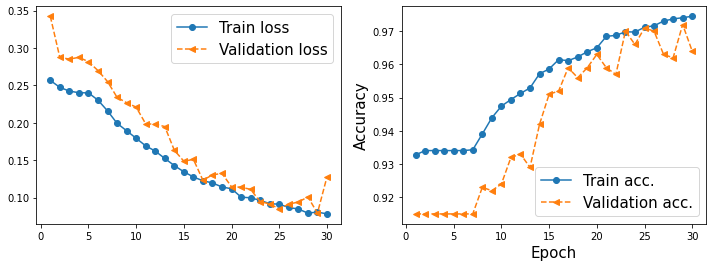

In [134]:
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<',
    label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [135]:
accuracy_test = 0
model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_dl:
        pred = model(x_batch)[:, 0]
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_test += is_correct.sum()
accuracy_test /= len(test_dl.dataset)
print(f'Test accuracy: {accuracy_test:.4f}')

Test accuracy: 0.9757


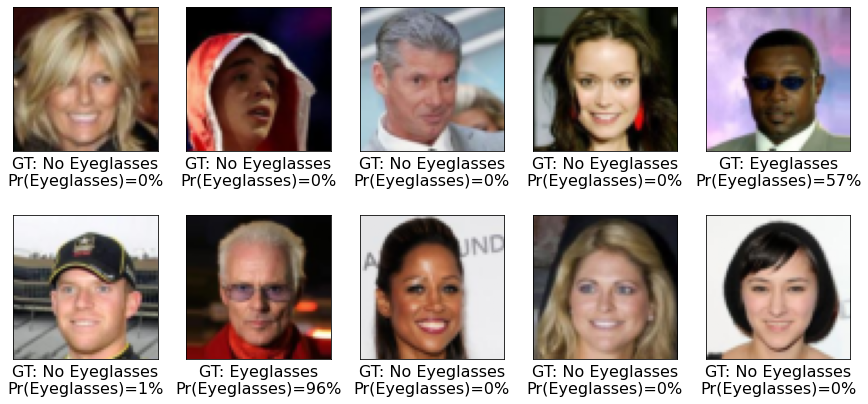

In [138]:
pred = model(x_batch)[:, 0] * 100
fig = plt.figure(figsize=(15, 7))
for j in range(10, 20):
    ax = fig.add_subplot(2, 5, j-10+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(x_batch[j].permute(1, 2, 0))
    if y_batch[j] == 1:
        label='Eyeglasses'
    else:
        label = 'No Eyeglasses'
    ax.text(
        0.5, -0.15,
        f'GT: {label:s}\nPr(Eyeglasses)={pred[j]:.0f}%',
        size=16,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes
    )
plt.show()